In [68]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'
plt.style.use('seaborn')
%matplotlib inline

In [74]:
import nltk
from nltk.corpus import stopwords

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [19]:
len(messages)

5574

In [20]:
messages[90:101]

['ham\tYeah do! Don‘t stand to close tho- you‘ll catch something!',
 "ham\tSorry to be a pain. Is it ok if we meet another night? I spent late afternoon in casualty and that means i haven't done any of y stuff42moro and that includes all my time sheets and that. Sorry.",
 'ham\tSmile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!',
 'spam\tPlease call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!',
 'ham\tHavent planning to buy later. I check already lido only got 530 show in e afternoon. U finish work already?',
 'spam\tYour free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify. Get Usher and Britney. FML, PO Box 5249, MK17 92H. 450Ppw 16',
 'ham\tWatching telugu movie..wat abt u?',
 'ham\ti see. When we finish we have loads of loans to pay',
 'ham\tHi. Wk been ok - on hols now! Ye

In [21]:
for mess_num, mess in enumerate(messages[:10]):
    print(mess_num, mess)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [22]:
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

In [24]:
messages[100].split('\t')

['ham', "Please don't text me anymore. I have nothing else to say."]

In [29]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [30]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [33]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [34]:
df['length'] = df['message'].apply(len)

In [35]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


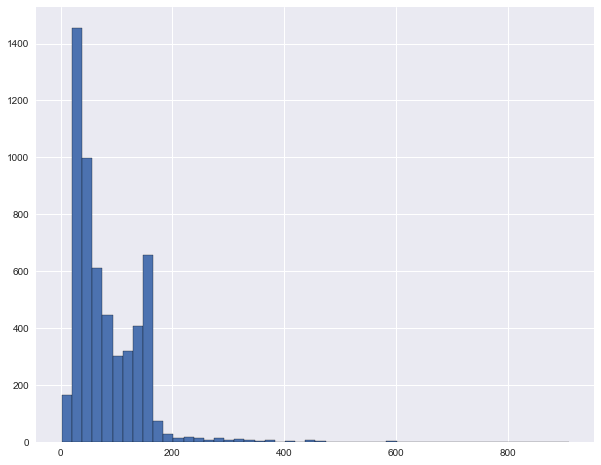

In [40]:
plt.figure(figsize=(10,8))
df['length'].hist(bins=50)

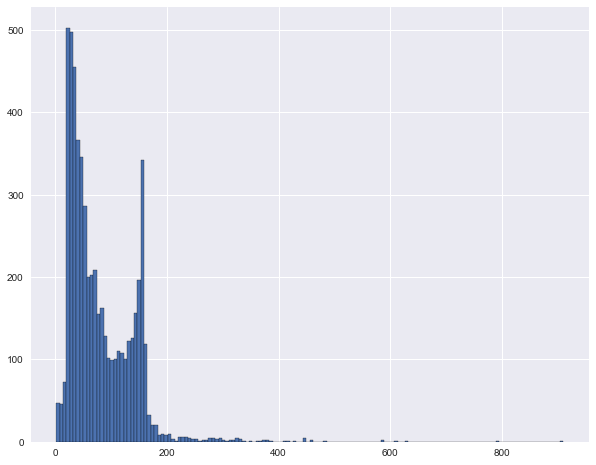

In [41]:
plt.figure(figsize=(10,8))
df['length'].hist(bins=150)

In [42]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [43]:
df['length'].idxmax()

1085

In [44]:
df.iloc[1085]

label                                                    ham
message    For me the love should start with attraction.i...
length                                                   910
Name: 1085, dtype: object

In [46]:
df[df['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [48]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

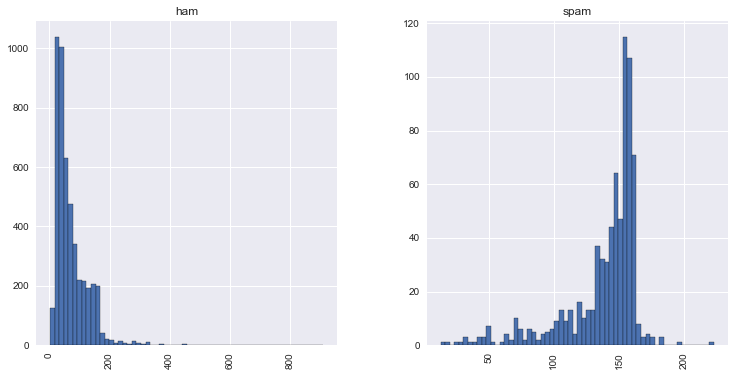

In [63]:
df.hist(column='length', by='label', figsize=(12,6), bins=60);

In [64]:
msg = "Sample message! Notice: it has punctuation."

In [69]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
nopunc = [c for c in msg if c not in string.punctuation]

In [73]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [75]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
nopunc = ''.join(nopunc)

In [77]:
nopunc

'Sample message Notice it has punctuation'

In [78]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [79]:
clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [80]:
clean_msg

['Sample', 'message', 'Notice', 'punctuation']

In [81]:
def text_process(m):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Return clean list
    """
    nopunc = [char for char in m if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_m = [w for w in nopunc.split() if w.lower() not in stopwords.words('english')]
    return(clean_m)

In [83]:
# test
df['message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

In [86]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

In [91]:
len(bow_transformer.vocabulary_)

11425

In [94]:
mess4 = df['message'][3]

In [95]:
mess4

'U dun say so early hor... U c already then say...'

In [96]:
bow4 = bow_transformer.transform([mess4])

In [99]:
bow4.data

array([2, 1, 1, 1, 1, 1, 2])

In [101]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [102]:
bow4.shape

(1, 11425)

In [103]:
bow_transformer.get_feature_names()[4068]

'U'

In [104]:
bow_transformer.get_feature_names()[9554]

'say'

In [105]:
mess4

'U dun say so early hor... U c already then say...'

In [106]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [107]:
messages_bow = bow_transformer.transform(df['message'])

In [108]:
print('Shape of the Sparse Matrix ', messages_bow.shape)

Shape of the Sparse Matrix  (5572, 11425)


In [111]:
5572*11425

63660100

In [110]:
print("Number of non-zero occurances: ", messages_bow.nnz)

Number of non-zero occurances:  50548


In [114]:
sparcity = (100*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))

In [116]:
sparcity

0.07940295412668218

In [115]:
print("sparcity {}".format(round(sparcity)))

sparcity 0


In [117]:
print("sparcity {}".format(sparcity))

sparcity 0.07940295412668218


In [119]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [120]:
tfidf4 = tfidf_transformer.transform(bow4)

In [122]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [123]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [124]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['dog']]

7.546247245889701

In [128]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['cat']]

8.239394426449646

In [129]:
messages_tdidf = tfidf_transformer.transform(messages_bow)

In [132]:
spam_detect_model = MultinomialNB().fit(messages_tdidf, df['label'])

In [135]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [137]:
df.iloc[3]['label']

'ham'

In [138]:
# really should have done train_test_split then tested on the test data
all_pred = spam_detect_model.predict(messages_tdidf)

In [140]:
msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.3)

In [142]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [143]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x115397598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [144]:
predictions = pipeline.predict(msg_test)

In [146]:
print(confusion_matrix(label_test, predictions))
print('\n')
print(classification_report(label_test, predictions))

[[1440    0]
 [  64  168]]


             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1440
       spam       1.00      0.72      0.84       232

avg / total       0.96      0.96      0.96      1672



In [148]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [149]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x115397598>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [150]:
predictions = pipeline.predict(msg_test)

In [151]:
print(confusion_matrix(label_test, predictions))
print('\n')
print(classification_report(label_test, predictions))

[[1440    0]
 [  55  177]]


             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1440
       spam       1.00      0.76      0.87       232

avg / total       0.97      0.97      0.97      1672

